In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('lines', linewidth=1.0)

## Чтение данных

Прочитаем `csv` файлы с результатами и удалим все строчки для тока > 250 A.

Наблюдаемый на ВтАХ "срыв", скорее всего, связан с тем, что при больших потерях на свободных носителях заряда перестаёт хватать усиления для поддержания лазерной генерации. Т.е. в какой-то момент квазиуровни Ферми оказываются выше верхней границы квантовой ямы, и дополнительное повышение концентрации в активной области становится фактически невозможным, т.к. оно должно сопровождаться таким же ростом концентрации в волноводе или спейсере.

Стоит также отметить, что положение квазиуровней Ферми в активной области определяется функцией плотности состояний, которая, на сколько я понимаю, сейчас задана произвольно -- с помощью подгонки к экспериментальным результатам. Поэтому рассчитывать на то, что положение этих уровней при очень сильной накачке будет правильным, наверное, не стоит.

In [2]:
df3_1D = pd.read_csv('3mm_1D.csv', sep='\t')
df3_1D = df3_1D[df3_1D['I']<250]
df3_1D

,V,J,I,P1,P2,I_srh,I_rad,I_aug
0,0.00,3.94282685569463e-05,1.182848e-07,3.154804e-23,3.202725e-26,5.695458e-22,1.286247e-24,6.160914e-31
1,0.05,1.51989731488698,4.559692e-03,9.615117e-24,9.761168e-27,5.308279e-17,1.255839e-19,2.312738e-25
2,0.10,1.44328445383834,4.329853e-03,6.398195e-23,6.495382e-26,3.351214e-16,8.357405e-19,2.075332e-24
3,0.15,1.44391326305376,4.331740e-03,3.744480e-22,3.801357e-25,1.847490e-15,4.891491e-18,1.591737e-23
4,0.20,1.92657278233342,5.779718e-03,2.148482e-21,2.181117e-24,9.935732e-15,2.806858e-17,1.162968e-22
5,0.25,1.83259246327131,5.497777e-03,1.231537e-20,1.250243e-23,5.325857e-14,1.609104e-16,8.250963e-22
6,0.30,1.37173566175284,4.115207e-03,7.090767e-20,7.198474e-23,2.868867e-13,9.265841e-16,5.720397e-21
7,0.35,1.37177222296743,4.115317e-03,4.109378e-19,4.171799e-22,1.560103e-12,5.370648e-15,3.889117e-20
8,0.40,1.37176204753781,4.115286e-03,2.398786e-18,2.435223e-21,8.587448e-12,3.135502e-14,2.599437e-19
9,0.45,1.37176966757667,4.115309e-03,1.410325e-17,1.431748e-20,4.790530e-11,1.843766e-13,1.711722e-18


In [3]:
df3_2D = pd.read_csv('3mm_2D.csv', sep='\t')
df3_2D = df3_2D[df3_2D['I']<250]
df3_2D

,V,J,I,P1,P2,I_srh,I_rad,I_aug,FCA
0,0.00,5.87782086066839e-05,1.763346e-07,9.993897e-25,1.014570e-27,3.807481e-22,8.589254e-25,5.128242e-32,0.138130
1,0.05,0.0362524714130489,1.087574e-04,9.615045e-24,9.761095e-27,5.308352e-17,1.255856e-19,2.312775e-25,0.138362
2,0.10,0.034280194251498,1.028406e-04,6.398195e-23,6.495382e-26,3.351250e-16,8.357499e-19,2.075359e-24,0.138612
3,0.15,0.0343055288522675,1.029166e-04,3.744480e-22,3.801357e-25,1.847509e-15,4.891545e-18,1.591757e-23,0.138879
4,0.20,0.000576995222338738,1.730986e-06,2.148480e-21,2.181114e-24,9.935877e-15,2.806900e-17,1.162988e-22,0.139165
5,0.25,-8.20464656770478e-05,-2.461394e-07,1.231539e-20,1.250245e-23,5.325937e-14,1.609129e-16,8.251107e-22,0.139470
6,0.30,0.032728397980896,9.818519e-05,7.090770e-20,7.198477e-23,2.868897e-13,9.265941e-16,5.720465e-21,0.139794
7,0.35,0.0324304317995985,9.729130e-05,4.109380e-19,4.171800e-22,1.560120e-12,5.370707e-15,3.889163e-20,0.140139
8,0.40,0.0324244190353095,9.727326e-05,2.398787e-18,2.435224e-21,8.587539e-12,3.135536e-14,2.599468e-19,0.140503
9,0.45,0.032393500779493,9.718050e-05,1.410326e-17,1.431748e-20,4.790581e-11,1.843786e-13,1.711742e-18,0.140887


In [4]:
df5_1D = pd.read_csv('5mm_1D.csv', sep='\t')
df5_1D = df5_1D[df5_1D['I']<250]
df5_1D

,V,J,I,P1,P2,I_srh,I_rad,I_aug
0,0.00,3.94282685569463e-05,1.971413e-07,3.154804e-23,3.202725e-26,9.492431e-22,2.143745e-24,1.026819e-30
1,0.05,1.51989731488698,7.599487e-03,1.583850e-23,1.607908e-26,8.847132e-17,2.093064e-19,3.854563e-25
2,0.10,1.44328445383834,7.216422e-03,1.053929e-22,1.069938e-25,5.585356e-16,1.392901e-18,3.458887e-24
3,0.15,1.44391326305376,7.219566e-03,6.167876e-22,6.261564e-25,3.079149e-15,8.152485e-18,2.652895e-23
4,0.20,1.92657278233342,9.632864e-03,3.538878e-21,3.592633e-24,1.655955e-14,4.678097e-17,1.938280e-22
5,0.25,1.83259246327131,9.162962e-03,2.028478e-20,2.059290e-23,8.876428e-14,2.681840e-16,1.375160e-21
6,0.30,1.37173566175284,6.858678e-03,1.167897e-19,1.185637e-22,4.781445e-13,1.544307e-15,9.533994e-21
7,0.35,1.37177222296743,6.858861e-03,6.768229e-19,6.871037e-22,2.600172e-12,8.951080e-15,6.481861e-20
8,0.40,1.37176204753781,6.858810e-03,3.950730e-18,4.010741e-21,1.431241e-11,5.225836e-14,4.332395e-19
9,0.45,1.37176966757667,6.858848e-03,2.322690e-17,2.357971e-20,7.984216e-11,3.072943e-13,2.852870e-18


In [5]:
df5_2D = pd.read_csv('5mm_2D.csv', sep='\t')
df5_2D = df5_2D[df5_2D['I']<250]
df5_2D

,V,J,I,P1,P2,I_srh,I_rad,I_aug,FCA
0,0.00,0.000059,2.938910e-07,9.994305e-25,1.014612e-27,6.345801e-22,1.431542e-24,8.547070e-32,0.138130
1,0.05,0.036252,1.812624e-04,1.583850e-23,1.607908e-26,8.847253e-17,2.093093e-19,3.854625e-25,0.138362
2,0.10,0.034280,1.714010e-04,1.053929e-22,1.069938e-25,5.585417e-16,1.392917e-18,3.458932e-24,0.138612
3,0.15,0.034306,1.715276e-04,6.167876e-22,6.261564e-25,3.079182e-15,8.152575e-18,2.652929e-23,0.138879
4,0.20,0.000577,2.884976e-06,3.538874e-21,3.592628e-24,1.655979e-14,4.678167e-17,1.938313e-22,0.139165
5,0.25,-0.000082,-4.102323e-07,2.028481e-20,2.059293e-23,8.876562e-14,2.681882e-16,1.375185e-21,0.139470
6,0.30,0.032728,1.636420e-04,1.167897e-19,1.185637e-22,4.781495e-13,1.544324e-15,9.534108e-21,0.139794
7,0.35,0.032430,1.621522e-04,6.768232e-19,6.871040e-22,2.600200e-12,8.951178e-15,6.481938e-20,0.140139
8,0.40,0.032424,1.621221e-04,3.950732e-18,4.010743e-21,1.431256e-11,5.225893e-14,4.332446e-19,0.140503
9,0.45,0.032394,1.619675e-04,2.322691e-17,2.357972e-20,7.984301e-11,3.072976e-13,2.852903e-18,0.140887


## Ватт-амперные характеристики


<IPython.core.display.Javascript object>


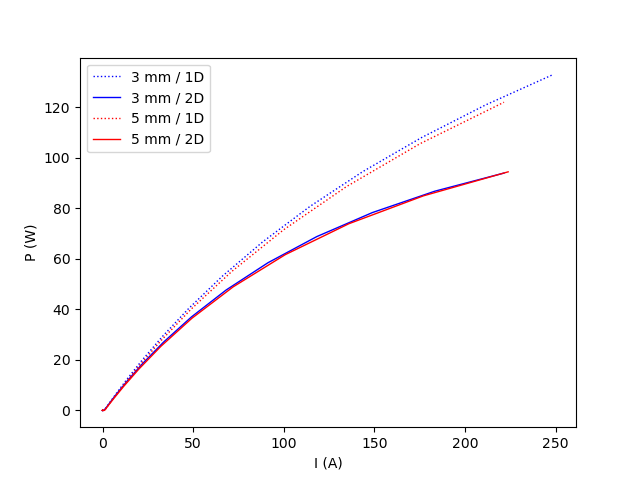

In [6]:
plt.close()
plt.figure()
plt.plot(df3_1D['I'], df3_1D['P1'], color='b', ls=':', label='3 mm / 1D')
plt.plot(df3_2D['I'], df3_2D['P1'], color='b', ls='-', label='3 mm / 2D')
plt.plot(df5_1D['I'], df5_1D['P1'], color='r', ls=':', label='5 mm / 1D')
plt.plot(df5_2D['I'], df5_2D['P1'], color='r', ls='-', label='5 mm / 2D')
plt.legend()
plt.xlabel('I (A)')
plt.ylabel('P (W)');

## Анализ ВтАХ

Каждый раз при расчёте сохраняются 2 типа файлов:
1. файл с ВтАХ, ВАХ а также токами рекомбинации и потерями на свободных носителях;
2. по 1 файлу с зонной диаграммой для каждого значения напряжения.

В примере использования 1D модели раньше не сохранялись потери на свободных носителях, поэтому их нет в результатах. Сейчас в 1D примере расчётные значения поглощения на свободных носителях сохраняются.

По экспортируемым результатам можно понять, какую роль в отклонении ВтАХ от идеальной играют безызлучательная рекомбинация и внутренние потери. Можно записать следующую формулу:
\begin{equation*}
P = \frac{h\nu}{q} \eta_i \eta_d I.
\end{equation*}

Здесь $\eta_i = 1 - (I_{SRH} + I_{rad} + I_{Aug})/I$ -- доля тока, уходящая на стимулированное излучение, $\eta_d = \alpha_m / (\alpha_m + \alpha_{i,0} + \alpha_{i,FCA})$ -- эффективность вывода сгенерированного стимулированного излучения.

В 1D случае получаемая с помощью этой формулы мощность должна полностью совпадать с рассчитанными значениями. В 2D случае совпадение может не достигаться, т.к. данная формула не полностью учитывает эффект LSHB. В результатах он будет проявляться в следующем виде:
1. увеличатся токи рекомбинации и потери на свободных носителей -> это отразится в сохранённых значенияx;
2. увеличится (даже при неизменных потерях) падение мощности из-за внутренних потерь -> это отразится только в уменьшившихся значениях выходной мощности.

Ниже построены соответствующие зависимости.

<IPython.core.display.Javascript object>


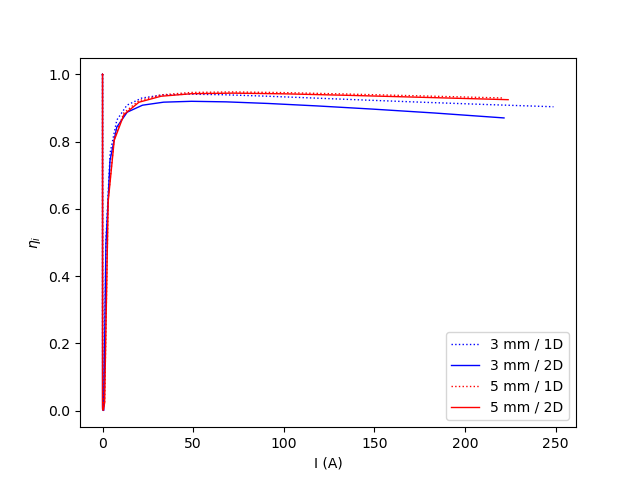

Text(0, 0.5, '$\\eta_i$')

In [7]:
ei3_1 = 1 - (df3_1D['I_srh'] + df3_1D['I_rad'] + df3_1D['I_aug']) / df3_1D['I']
ei5_1 = 1 - (df5_1D['I_srh'] + df5_1D['I_rad'] + df5_1D['I_aug']) / df5_1D['I']
ei3_2 = 1 - (df3_2D['I_srh'] + df3_2D['I_rad'] + df3_2D['I_aug']) / df3_2D['I']
ei5_2 = 1 - (df5_2D['I_srh'] + df5_2D['I_rad'] + df5_2D['I_aug']) / df5_2D['I']

plt.close()
plt.figure()
plt.plot(df3_1D['I'], ei3_1, color='b', ls=':', label='3 mm / 1D')
plt.plot(df3_2D['I'], ei3_2, color='b', ls='-', label='3 mm / 2D')
plt.plot(df5_1D['I'], ei5_1, color='r', ls=':', label='5 mm / 1D')
plt.plot(df5_2D['I'], ei5_2, color='r', ls='-', label='5 mm / 2D')
plt.legend()
plt.xlabel('I (A)')
plt.ylabel('$\eta_i$')

<IPython.core.display.Javascript object>


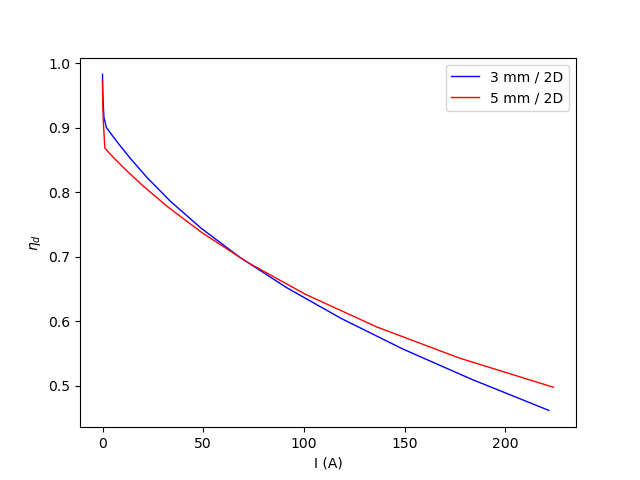

Text(0, 0.5, '$\\eta_d$')

In [8]:
alpha_m_3mm = 1 / (2 * 3e-1) * np.log(1 / (0.99 * 0.01))
alpha_m_5mm = 1 / (2 * 5e-1) * np.log(1 / (0.99 * 0.01))
ed3_2 = alpha_m_3mm / (alpha_m_3mm + df3_2D['FCA'])
ed5_2 = alpha_m_5mm / (alpha_m_5mm + df5_2D['FCA'])

plt.close()
plt.figure()
#plt.plot(df3_1D['I'], ed3_1, color='b', ls=':', label='3 mm / 1D')
plt.plot(df3_2D['I'], ed3_2, color='b', ls='-', label='3 mm / 2D')
#plt.plot(df5_1D['I'], ed5_1, color='r', ls=':', label='5 mm / 1D')
plt.plot(df5_2D['I'], ed5_2, color='r', ls='-', label='5 mm / 2D')
plt.legend()
plt.xlabel('I (A)')
plt.ylabel('$\eta_d$')

<IPython.core.display.Javascript object>


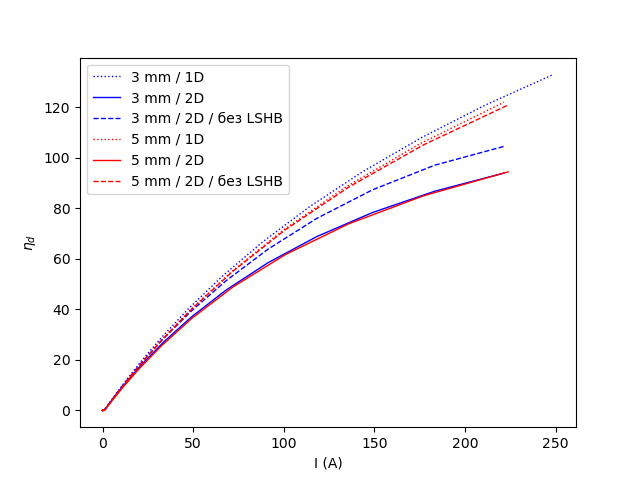

Text(0, 0.5, '$\\eta_d$')

In [9]:
k = 6.63e-34 * 3e8 / (1.6e-19 * 1.06e-6)

plt.close()
plt.figure()
plt.plot(df3_1D['I'], df3_1D['P1'], color='b', ls=':', label='3 mm / 1D')
plt.plot(df3_2D['I'], df3_2D['P1'], color='b', ls='-', label='3 mm / 2D')
plt.plot(df3_2D['I'], df3_2D['I']*k*ei3_2*ed3_2, color='b', ls='--', label='3 mm / 2D / без LSHB')
plt.plot(df5_1D['I'], df5_1D['P1'], color='r', ls=':', label='5 mm / 1D')
plt.plot(df5_2D['I'], df5_2D['P1'], color='r', ls='-', label='5 mm / 2D')
plt.plot(df5_2D['I'], df5_2D['I']*k*ei5_2*ed5_2, color='r', ls='--', label='5 mm / 2D / без LSHB')
plt.legend()
plt.xlabel('I (A)')
plt.ylabel('$\eta_d$')

На последнем графике к расчётным ВтАХ добавлены зависимости, полученные для 2D модели по приведённой выше формуле (штриховые линии). Разница между этими зависимостями и 1D результатами -- это непосредственное увеличение тока безызлучательной рекомбинации в внутренних оптических потерь из-за LSHB. Отклонение относительно 2D результатов -- уменьшение эффективности вывода излучения (увеличение "эффективных" потерь) в результате LSHB. Видно, что первый механизм сильнее проявляется в 3-мм лазере, второй -- в 5-мм лазере.